# Connect Intensive - Machine Learning Nanodegree
# Lesson 06: Clustering and Dimensionality Reduction
# Part 01: Clustering Mini Project

## Objectives
  - Perform [k-means clustering](http://scikit-learn.org/stable/modules/clustering.html#k-means) on the Enron Data Set.
  - Visualize different clusters that form before and after feature scaling.
  - Plot decision boundaries that arise from k-means clustering using two features.
  
## Prerequisites
  - You should have the following python packages installed:
    - [matplotlib](http://matplotlib.org/index.html)
    - [numpy](http://www.scipy.org/scipylib/download.html)
    - [pandas](http://pandas.pydata.org/getpandas.html)
    - [sklearn](http://scikit-learn.org/stable/install.html)
  - Lesson 02 in [the ConnectIntensive repo](https://github.com/nickypie/ConnectIntensive) introduces the Enron Data Set that will be used in this notebook
    - You should have cloned [**ud120-projects** repo](https://github.com/udacity/ud120-projects) to your local machine, and you'll need the full path for this repo on your machine

## Clustering Mini-Project

This Jupyter Notebook is intended to provide a friendly guide through the "Clustering Mini-Project" lesson... but if you're feeling pretty confident about your Python skills, consider going off-script! Try to work through the lesson on your own -- you may encounter some snags, and you can always refer back to this Notebook if you need a little push forward.

## Getting Started
As usual, we start by importing some useful libraries and modules. Don't worry if you get a warning message when importing `matplotlib` -- it just needs to build the font cache, and the warning is just to alert you that this may take a while the first time the cell is run.

**Run** the cell below to import useful libraries for this notebook.

In [1]:
%matplotlib inline
try:
    import numpy as np
    print("Successfully imported numpy! (Version {})".format(np.version.version))
except ImportError:
    print("Could not import numpy!")

    
try:
    import matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')
    print("Successfully imported matplotlib.pyplot! (Version {})".format(matplotlib.__version__))
except ImportError:
    print("Could not import matplotlib.pyplot!")

    
try:
    import pandas as pd
    print("Successfully imported pandas! (Version {})".format(pd.__version__))
    pd.options.display.max_rows = 10
except ImportError:
    print("Could not import pandas!")

    
try:
    from IPython.display import display
    print("Successfully imported display from IPython.display!")
except ImportError:
    print("Could not import display from IPython.display")
    
try:
    import sklearn
    print("Successfully imported sklearn! (Version {})".format(sklearn.__version__))
    skversion = int(sklearn.__version__[2:4])
except ImportError:
    print("Could not import sklearn!")

try:
    import pickle
    print("Successfully imported pickle!")
except ImportError:
    print("Could not import pickle")

Successfully imported numpy! (Version 1.10.4)
Successfully imported matplotlib.pyplot! (Version 1.5.3)
Successfully imported pandas! (Version 0.19.0)
Successfully imported display from IPython.display!
Successfully imported sklearn! (Version 0.17)
Successfully imported pickle!


## A little review -- Magic Functions and `pickle`

We're going to use the Enron Data Set from the [**ud120-projects** repo](https://github.com/udacity/ud120-projects) in this notebook. We last used this data set in [lesson-02.ipynb](https://github.com/nickypie/ConnectIntensive/blob/master/lesson-02.ipynb) to hone our `pandas` skills. In this notebook, we're going to perform [k-means clustering](http://scikit-learn.org/stable/modules/clustering.html#k-means) on the data to see if certain patterns emerge.

Recall that we had used the Jupyter Notebook [line magic](http://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained):

`%cd "..."`

By replacing the ellipses with a path, we can use this line magic to change the working directory for this Jupyter Notebook session.

**Update** the Magic Function `%cd "..."` in the cell below to reflect the correct path of the **ud120-projects** directory on your local machine.

Then **run** the cell to use [the pickle module](https://docs.python.org/2/library/pickle.html) to retrieve the Enron data dictionary. A message will print if the data dictionary was successfully loaded.

In [2]:
# Be sure to write the full path, up to and including "ud120-projects"
%cd "/Users/aahmed/Library/Mobile Documents/com~apple~CloudDocs/ML/MLND/ud120-projects"

try:
    pickle_file = open("final_project/final_project_dataset.pkl", "r")
    enron_data = pickle.load(pickle_file)
    pickle_file.close()
    print("Enron data loaded successfully!")
except IOError:
    print("No such file or directory! (Is there a problem with the path?)")

/Users/aahmed/Library/Mobile Documents/com~apple~CloudDocs/ML/MLND/ud120-projects
Enron data loaded successfully!


## Preprocessing

We couldn't find *all* the details for each person involved with the Enron scandal, so the Enron data set has some missing values denoted by `"NaN"` entries in the data dictionary. Because we must pass numeric arrays into `sklearn` modules, we need to preprocess the data dictionary a bit before we can use [`sklearn.cluster.KMeans()`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

**Run** the cell below to complete our preprocessing steps:
  - Remove the outlier: there is an entry `"TOTAL"` in the data dictionary containing totals of all features.
  - Create a pandas `DataFrame` object from the Enron data dictionary
  - Take the **transpose** of the Enron `DataFrame` with [`DataFrame.T`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.T.html), so that rows correspond to individuals (instances). Recall that we used [`stack()` and `unstack()`](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-by-stacking-and-unstacking) last time to accomplish this task... but taking the transpose is more straightforward.
  - Impute missing values: Replace all "NaN" values in the DataFrame with **zeroes**.

In [3]:
# Preprocessing the Enron dataset:
# there's an outlier--remove it! 
enron_data.pop("TOTAL", 0)

# Create a DataFrame object from the Enron data dictionary
enron_df = pd.DataFrame.from_dict(enron_data)

# Take the transpose (.T) of the Enron DataFrame,
# so that rows of the DataFrame correspond to individuals
enron_df = enron_df.T

# Change all entries in the DataFrame with "NaN" to zeroes.
enron_df[enron_df == "NaN"] = 0

# Display the DataFrame after preprocessing is complete
display(enron_df)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,0,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,0,178980,0,0,0,257817,3486,0,0,0,...,0,0,False,0,0,0,0,0,182466,257817
BANNANTINE JAMES M,0,0,-5104,0,james.bannantine@enron.com,4046157,56301,29,39,0,...,0,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,0,0,6680544,11200,0,0,0,...,1586055,2660303,False,3942714,0,267102,0,0,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,0,frank.bay@enron.com,0,129142,0,0,0,...,0,69,False,145796,-82782,239671,0,0,827696,63014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WINOKUR JR. HERBERT S,0,0,-25000,108579,0,0,1413,0,0,0,...,0,0,False,0,0,0,0,0,84992,0
WODRASKA JOHN,0,0,0,0,john.wodraska@enron.com,0,0,0,0,0,...,0,189583,False,0,0,0,0,0,189583,0
WROBEL BRUCE,0,0,0,0,0,139130,0,0,0,0,...,0,0,False,0,0,0,0,0,0,139130
YEAGER F SCOTT,0,0,0,0,scott.yeager@enron.com,8308552,53947,0,0,0,...,0,147950,True,3576206,0,158403,0,0,360300,11884758


## K-Means Clustering - Cluster Visualization
In this mini-project, you will perform [k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering) on the Enron Data Set. K-means clustering is a variant of [Lloyd's Algorithm](https://en.wikipedia.org/wiki/Lloyd's_algorithm) or Voronoi Iteration. We're going to define a function `DrawClusters()` that will allow us to visualize the resulting clusters. 

**Read** the cell below to get an idea of what happens in the `DrawClusters()` function. The `DrawFunction()` function is a modified version of [the `Draw()` function from `"ud120-projects/kmeans/k_means_cluster.py"`](https://github.com/udacity/ud120-projects/blob/master/k_means/k_means_cluster.py). Here's a quick summary of changes:
  - `DrawClusters()` now works with the `pandas` `DataFrame` object `enron_df`.
  - Some of the functionality from `"ud120-projects/tools/feature_format.py"` is incorporated into `DrawClusters()`:
    - The ability to remove instances with **all** zeroes from k-means clustering
    - The ability to remove instances with **any** zeroes from k-means clustering
    - The ability to rescale features, remapping them to the interval [0,1]
  - `DrawClusters()` also draws the resulting decision boundary when `feature_list` contains only two features.

In [4]:
from sklearn.cluster import KMeans

def DrawClusters(n_clusters = 2,\
                 feature_list = ["salary","exercised_stock_options"],\
                 remove_any_zeroes = False,\
                 remove_all_zeroes = True,\
                 rescale_features = False,\
                 x_label = 'Salary',\
                 y_label = 'Exercised Stock Options'):
    
    '''
    Plots k-means clusters trained on a list of features from enron_df
    @param n_clusters:        an integer, the number of clusters to form.
    @param feature_list:      a list of strings, the features to use in KMeans clustering
                              (first two features in the list will be plotted on x,y axes)
                              if len(feature_list) == 2, decision boundaries will be plotted 
    @param remove_any_zeroes: a boolean, whether or not to remove points when clustering
                              that contain ANY zeroes
    @param remove_all_zeroes: a boolean, whether or not to remove points when clustering
                              that contain ONLY zeroes
    @param rescale_features:  a boolean, whether or not to rescale features from 0 to 1
    @param x_label:           a string, the x-axis label of the plot
    @param y_label:           a string, the y-axis label of the plot
    '''

    # Initialize color and shape lists for scatterplot
    # Note: need to lengthen the color and shape lists if
    #       you want to use more than 7 clusters.
    color_list = ["r","g","b","c","m","y","k"]
    shape_list = ["^","o","s","v","D","<","h"]
    
    # Initialize figure and axes:
    fig, ax = plt.subplots()

    # We are going to cluster the data using KMeans,
    # based on the features from the parameter feature_list.
    X = enron_df[feature_list]
    
    # We can see if clustering correctly identified POIs
    y = enron_df['poi']
    
    # If desired, remove instances where ANY feature is zero
    if remove_any_zeroes:
        X = X[~(X.T == 0).any()]
        
    # If desired, remove instances where ALL features are zeroes
    if remove_all_zeroes:
        X = X[~(X.T == 0).all()]

    # If desired, rescale features
    if rescale_features:
        for feature in X.columns:
            min_feature = X[~(X[feature] == 0)][feature].min()
            max_feature = X[~(X[feature] == 0)][feature].max()
            range_feature = max_feature - min_feature
            X[feature] = (X[feature] - min_feature)*1.0 / range_feature
            
    # If we removed any instances above, we need to keep 
    # only the corresponding instances in y (the POI Series)
    y = y.loc[X.index]
    
    # By default, the first two features in the list are chosen
    # as the x and y features.
    x_feature = feature_list[0]
    y_feature = feature_list[1]

    # Determine the min & max values of x_feature, compute the range,
    # and pad the minimum and maximum x values by 5% of the range
    x_min, x_max = X[x_feature].min(), X[x_feature].max()
    x_range = x_max - x_min
    x_min -= x_range * 0.05
    x_max += x_range * 0.05
    
    # Determine the min & max values of y_feature, compute the range,
    # and pad the minimum and maximum y values by 5% of the range
    y_min, y_max = X[y_feature].min(), X[y_feature].max()
    y_range = y_max - y_min
    y_min -= y_range * 0.05
    y_max += y_range * 0.05
    
    # Compute k-means clustering.
    kmns = KMeans(n_clusters = n_clusters).fit(X)

    
    # We can visualize the decision boundaries if the 
    # k-means clusters are formed from just two features
    if len(feature_list) == 2:
        # Return coordinate matrices xx and yy from arrays
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, num = 500),\
                             np.linspace(y_min, y_max, num = 500))

        # Use the clustering to make a prediction for each point
        # in the coordinate matrices, then reshape for plotting.
        Z = kmns.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot semitransparent filled contours for the
        # cluster decision boundaries
        ax.contourf(xx, yy, Z,\
                    levels=list(np.arange(n_clusters+1)-0.5),\
                    colors=tuple(color_list[:n_clusters]),alpha=0.2)
    
    # Scatterplot all of the points in each cluster,
    # with each cluster a different color and shape
    pred = kmns.predict(X)
    for cluster_idx in range(n_clusters):
        X_cluster = X[pred == cluster_idx]
        ax.scatter(X_cluster[x_feature], X_cluster[y_feature],\
                   s=30, marker = shape_list[cluster_idx],\
                   edgecolor='k', facecolor=color_list[cluster_idx], alpha=0.8)
        
    # Denote the centroids of each cluster with a white X
    centers = kmns.cluster_centers_
    if len(feature_list) == 2:
        for center in centers:
            ax.scatter(center[0],center[1],marker='x',facecolor="w",linewidth=3,s=50)
            
    # Set the title and axes labels, and adjust the aspect ratio for rescaled data
    if rescale_features:
        title   = ax.set_title("K Means - {} Clusters (Rescaled)".format(n_clusters))
        # Force the axes aspect ratio to be plotted equally
        ax.set(adjustable='box-forced', aspect='equal')
    else:
        title   = ax.set_title("K Means - {} Clusters".format(n_clusters))
    x_label = ax.set_xlabel(x_label)
    y_label = ax.set_ylabel(y_label)
    
    # Set the x- and y-axis limits using the padded minimum and maximum values
    xlim = ax.set_xlim((x_min,x_max))
    ylim = ax.set_ylim((y_min,y_max))
    
print("DrawClusters() is ready to use!")

DrawClusters() is ready to use!


# Exercises
The exercises below correspond to the quizzes in the Clustering Mini Project. As you complete this notebook, you may check your progress by entering the solutions into the corresponding quizzes.

## Quiz: Clustering Features
**Run** the cell below, which will create a scatterplot of the data, then look at the resulting figure. What clusters you would expect to arise from this data if 2 clusters are created? That is, how would you partition the data into two clusters?

In the accompanying quiz, "Quiz: Clustering Features", enter the two feature names from the cell below that we'll use in k-means clustering.

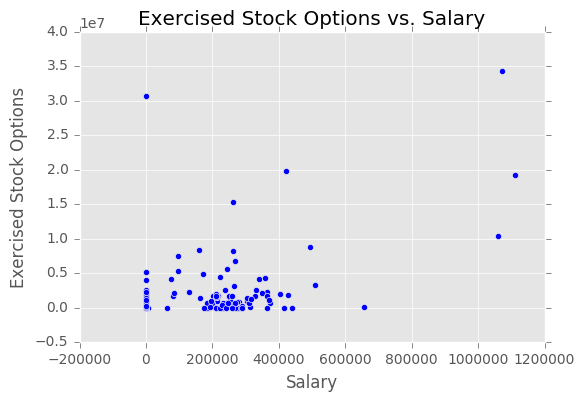

In [5]:
fig, ax = plt.subplots()
ax.scatter(enron_df["salary"],enron_df["exercised_stock_options"])
title   = ax.set_title("Exercised Stock Options vs. Salary")
xlabel  = ax.set_xlabel("Salary")
ylabel  = ax.set_ylabel("Exercised Stock Options")

## Quiz: Deploying Clustering
**Run** the cell below, which will perform k-means clustering on the data using only the `salary` and `exercised_stock_options` features. Look at the resulting clusters -- because we're only using two features, we can also plot the decision boundary in the plane.

In the accompanying quiz, "Quiz: Deploying Clusters", state whether the two clusters partition the data as you expected... there's no wrong answer here :)

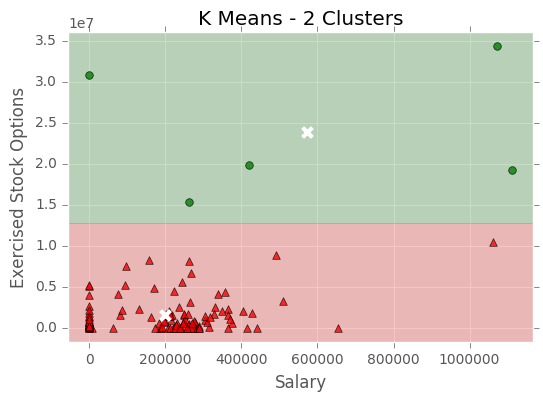

In [6]:
DrawClusters(n_clusters = 2,\
             feature_list = ["salary","exercised_stock_options"],\
             remove_any_zeroes = False,\
             remove_all_zeroes = True,\
             rescale_features = False,\
             x_label = 'Salary',\
             y_label = 'Exercised Stock Options')

You may notice in the cluster scatterplot that the decision boundary between the two centroids (denoted by white X symbols) does not appear to be perpendicular to the line-of-centers between the centroids... do you understand why?

## Quiz: Clustering with 3 Features

**Run** the cell below to add a third feature to features_list, `total_payments`. The clustering is now performed using 3 input features instead of 2 (obviously we can still only visualize the original 2 features, `salary` and `exercised_stock_options`). We also can't visualize the decision boundary anymore, because the points all have different values for the `total_payments` feature. Compare the clusterings to those you obtained with 2 input features. Do any points switch clusters? How many? This new clustering, using 3 features, couldn’t have been guessed by eye -- it was the k-means algorithm that identified it.

In the accompanying quiz, "Quiz: Deploying Clusters", state how many points, if any, change clusters after adding the `total_payments` feature to `feature_list`.

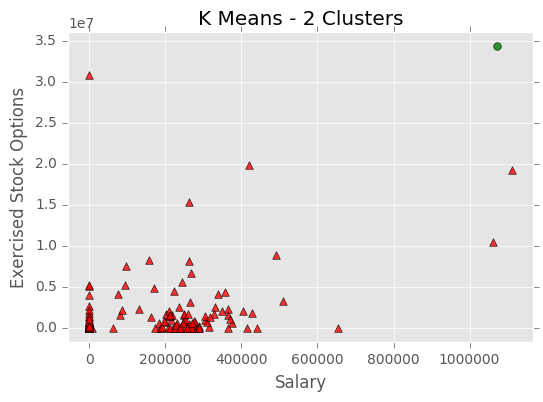

In [7]:
DrawClusters(n_clusters = 2,\
             feature_list = ["salary","exercised_stock_options","total_payments"],\
             remove_any_zeroes = False,\
             remove_all_zeroes = True,\
             rescale_features = False,\
             x_label = 'Salary',\
             y_label = 'Exercised Stock Options')

## Quiz: Stock Option Range

We're going to cover [feature scaling](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html), a type of preprocessing that you should perform before some classification and regression tasks. Here’s a sneak preview that should call your attention to the general outline of what feature scaling does.

What are the **maximum** and **minimum** values taken by the `exercised_stock_options` feature used in this example? You will enter these values in the corresponding quiz, "Quiz: Stock Option Range."

**Note:** In one of the preprocessing steps, all `NaN` entries in `enron_df` were changed to zeroes. We do this because all features passed into `sklearn` classifiers must be numeric. So, to answer this question, you may want to look at the original data *before* this preprocessing step was performed. To help with this task, **run** the cell below to create the data frame `df` from the `enron_data` dictionary.

In [8]:
# Create a DataFrame object from the Enron data dictionary
df = pd.DataFrame.from_dict(enron_data)

# Take the transpose (.T) of the Enron DataFrame,
# so that rows of the DataFrame correspond to individuals
df = df.T

print("DataFrame df has been created!")

DataFrame df has been created!


In [58]:
df_nonan_stock =  df[~(df["exercised_stock_options"]=="NaN")]
print "Max Value of Stock Options {}".format(df_nonan_stock['exercised_stock_options'].max())
print "Min Value of Stock Options {}".format(df_nonan_stock['exercised_stock_options'].min())

Max Value of Stock Options 34348384
Min Value of Stock Options 3285


## Quiz: Salary Range

What are the **maximum** and **minimum** values taken by the `salary` feature used in this example? You will enter these values in the corresponding quiz, "Quiz: Salary Range."

In [59]:
df_nonan_salary =  df[~(df["salary"]=="NaN")]
print "Max Value of Salary {}".format(df_nonan_salary['salary'].max())
print "Min Value of Salary {}".format(df_nonan_salary['salary'].min())


Max Value of Salary 1111258
Min Value of Salary 477


## Quiz: Clustering Changes

**Run** the cell below to plot the original two clusters, with the features `salary` and `exercised_stock_options`. Note that the features are not yet scaled.

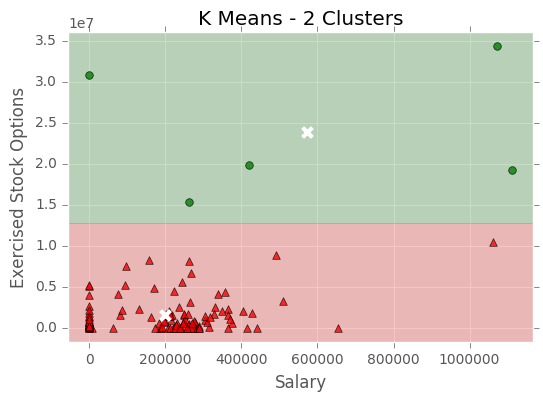

In [60]:
DrawClusters(n_clusters = 2,\
             feature_list = ["salary","exercised_stock_options"],\
             remove_any_zeroes = False,\
             remove_all_zeroes = True,\
             rescale_features = False,\
             x_label = 'Salary',\
             y_label = 'Exercised Stock Options')

Now **run** the cell below to do simple feature rescaling, mapping the original ranges of `exercised_stock_options` and `salary` onto the interval [0,1]. You should find that some of the points change clusters! You should also find that these clusters are not as stable as in the previous examples. **Run** the cell multiple times. You should find that the reported clusters are sometimes different, depending on where the centroids were initialized for k-means.

In the accompanying quiz, "Quiz: Clustering Changes", one possible clustering result is depicted after feature rescaling. **Check** the boxes next to points that change clusters after feature rescaling in this example scatterplot.

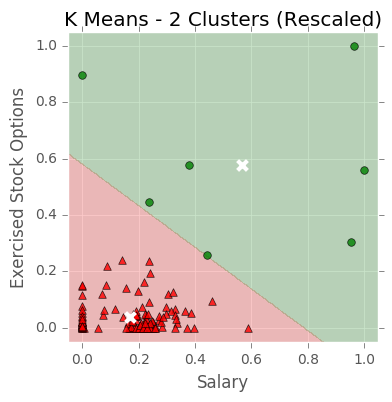

In [61]:
DrawClusters(n_clusters = 2,\
             feature_list = ["salary","exercised_stock_options"],\
             remove_any_zeroes = False,\
             remove_all_zeroes = True,\
             rescale_features = True,\
             x_label = 'Salary',\
             y_label = 'Exercised Stock Options')

## Further Exploration

At this point, you've completed the k-means mini project -- congratulations!  Below are a few more examples of k-means clustering on the Enron Data Set. Feel free to **run** these cells to see additional k-means clustering examples.

You can also read [the `sklearn` documentation on `sklearn.cluster.KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and [the KMeans user guide](http://scikit-learn.org/stable/modules/clustering.html#k-means) to learn more about the algorithm and about other parameters that you may set when calling KMeans.

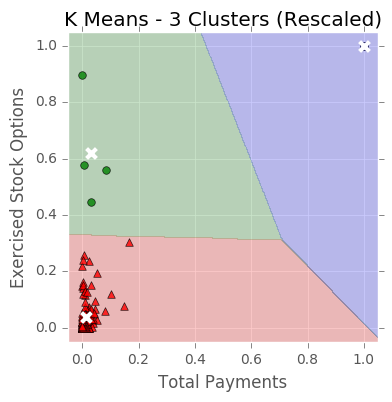

In [62]:
# Example of k-means clustering with 3 clusters, different features, rescaled

DrawClusters(n_clusters = 3,\
             feature_list = ["total_payments","exercised_stock_options"],\
             remove_any_zeroes = False,\
             remove_all_zeroes = True,\
             rescale_features = True,\
             x_label = 'Total Payments',\
             y_label = 'Exercised Stock Options')

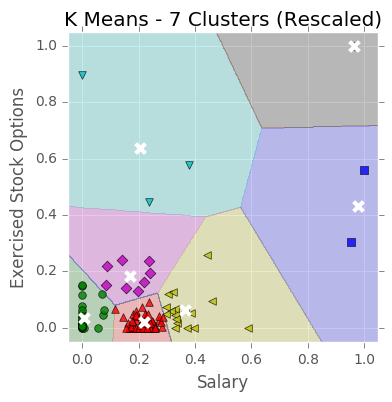

In [63]:
# Example of k-means clustering with 7 clusters, rescaled

DrawClusters(n_clusters = 7,\
             feature_list = ["salary","exercised_stock_options"],\
             remove_any_zeroes = False,\
             remove_all_zeroes = True,\
             rescale_features = True,\
             x_label = 'Salary',\
             y_label = 'Exercised Stock Options')

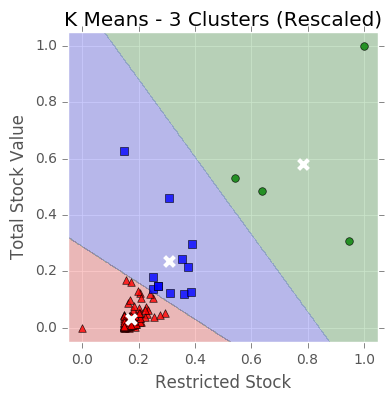

In [64]:
# Example of k-means clustering with 3 clusters, different features, rescaled

DrawClusters(n_clusters = 3,\
             feature_list = ["restricted_stock","total_stock_value"],\
             remove_any_zeroes = False,\
             remove_all_zeroes = True,\
             rescale_features = True,\
             x_label = 'Restricted Stock',\
             y_label = 'Total Stock Value')